# Costa Rica Proxy Means Test for Poverty Levels: Machine Learning

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
pd.set_option('display.max_columns', 200)

In [4]:
data = pd.read_csv('train.csv.zip')

In [5]:
data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [8]:
#Finding the shape of the data

f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns."

'The dataset has 9557 rows and 143 columns.'

<AxesSubplot:>

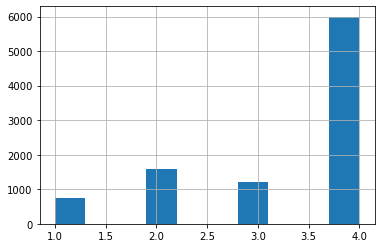

In [9]:
#Finding out the distribution of income levels (Targets)

#For reference: Target - the target is an ordinal variable indicating groups of income levels.
#1 = extreme poverty
#2 = moderate poverty
#3 = vulnerable households
#4 = non vulnerable households

data['Target'].hist()

#most households within this data set are non-vulnerable households.

In [60]:
#Selecting features

new_data = data[['male', 'female', 'instlevel1','instlevel2','instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9', 'rooms','bedrooms', 'hhsize', 'v14a', 'refrig', 'escolari', 'area1', 'area2', 'estadocivil3','estadocivil4','estadocivil5','estadocivil6','estadocivil7', 'parentesco1', 'hogar_total','lugar1',
'lugar2','lugar3','lugar4','lugar5', 'lugar6','v2a1','overcrowding', 'tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5', 'meaneduc', 'Target']]

#Changing to only head of households

tempdf = new_data[new_data['parentesco1']== 1]

#dropping NaaNs
tempdf = tempdf.apply (pd.to_numeric, errors='coerce')
tempdf = tempdf.dropna()
tempdf = tempdf.reset_index(drop=True)

tempdf.head()





,male,female,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,rooms,bedrooms,hhsize,v14a,refrig,escolari,area1,area2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,hogar_total,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,v2a1,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,meaneduc,Target
0,1,0,0,0,0,1,0,0,0,0,0,3,1,1,1,1,10,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,190000.0,1.000000,0,0,1,0,0,10.0,4
1,1,0,0,0,0,0,0,0,0,1,0,4,1,1,1,1,12,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,135000.0,1.000000,0,0,1,0,0,12.0,4
2,1,0,0,0,0,0,1,0,0,0,0,5,3,4,1,1,11,1,0,0,0,0,0,0,1,4,1,0,0,0,0,0,180000.0,1.333333,0,0,1,0,0,11.0,4
3,1,0,0,0,0,1,0,0,0,0,0,2,1,4,1,1,9,1,0,0,0,0,0,0,1,4,1,0,0,0,0,0,130000.0,4.000000,0,0,1,0,0,10.0,4
4,0,1,0,0,0,0,1,0,0,0,0,3,2,2,1,1,11,1,0,0,0,1,0,0,1,2,1,0,0,0,0,0,100000.0,1.000000,0,1,0,0,0,23.0,4


In [56]:
#Preparing Dataset
y = tempdf['Target']
X = tempdf[['male', 'female', 'instlevel1','instlevel2','instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9', 'rooms','bedrooms', 'hhsize', 'v14a', 'refrig', 'escolari', 'area1', 'area2','estadocivil3','estadocivil4','estadocivil5','estadocivil6','estadocivil7', 'hogar_total','lugar1',
'lugar2','lugar3','lugar4','lugar5', 'lugar6','v2a1','overcrowding', 'tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5', 'meaneduc']]

In [57]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)

In [58]:
#Specify model
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [59]:
#Fit model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
#Predict
model.predict(X_test)

array([3, 1, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 1, 4, 2, 4, 2, 4, 1, 1, 4, 4,
       4, 1, 3, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 2, 4, 3,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 3, 3, 4, 4, 4, 4, 3, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 2, 4, 3, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 4, 4, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4,
       4, 1, 4, 4, 4, 2, 4, 1, 4, 2, 2, 2, 4, 3, 4, 4, 2, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2,
       4, 4, 3, 4, 1, 4, 4, 3, 3, 3, 4, 3, 3, 4, 3, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 2, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 4, 3, 4, 4, 3, 2, 4,
       4, 4, 2, 2, 3, 3, 1, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [63]:
#Percentage of correctly predicted
#Creating data frame
test_result = pd.DataFrame({'y_pred_prob':model.predict_proba(X_test)[:,1],
                            'y_pred':model.predict(X_test),
                            'y_test':y_test})
test_result['correctly predicted'] =(test_result['y_pred']==test_result['y_test'])

test_result

,y_pred_prob,y_pred,y_test,correctly predicted
717,0.0,3,1,False
39,0.0,1,4,False
700,0.0,4,4,True
21,0.0,4,4,True
598,0.0,4,3,False
...,...,...,...,...
89,0.0,3,4,False
177,0.0,4,4,True
242,1.0,2,2,True
388,1.0,2,4,False


In [64]:
#calculating percentage correctly predicted

test_result['correctly predicted'].value_counts(normalize=True)

True     0.616564
False    0.383436
Name: correctly predicted, dtype: float64

In [66]:
#accuracy score
score = accuracy_score(y_test, model.predict(X_test))

score


0.6165644171779141

In [70]:
#ROC-AUC

score = roc_auc_score(y, model.predict_proba(X), multi_class='ovr')
score 


#why are they so different?

0.8083198527867219